<a href="https://colab.research.google.com/github/felipedias2290/projetosoftware2/blob/main/quickstarts/Get_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nova ordem

Pré-visualização dos dados:
   id_venda  data_venda    produto    categoria  valor_venda
0         1  2023-01-01  Produto A  Eletrônicos       1500.0
1         2  2023-01-05  Produto B       Roupas        350.0
2         3  2023-02-10  Produto C  Eletrônicos       1200.0
3         4  2023-03-15  Produto D       Livros        200.0
4         5  2023-03-20  Produto E  Eletrônicos        800.0

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venda     14 non-null     int64  
 1   data_venda   14 non-null     object 
 2   produto      14 non-null     object 
 3   categoria    14 non-null     object 
 4   valor_venda  14 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 692.0+ bytes
None

Estatísticas descritivas:
       id_venda  valor_venda
count   14.0000    14.000000
mean     7.5000   628.5714

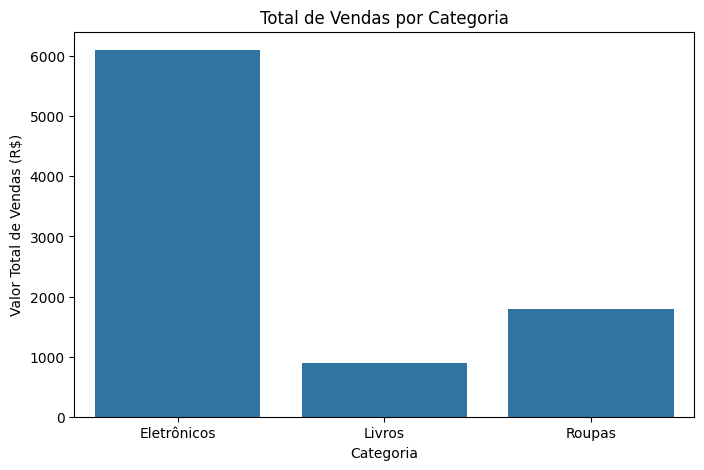

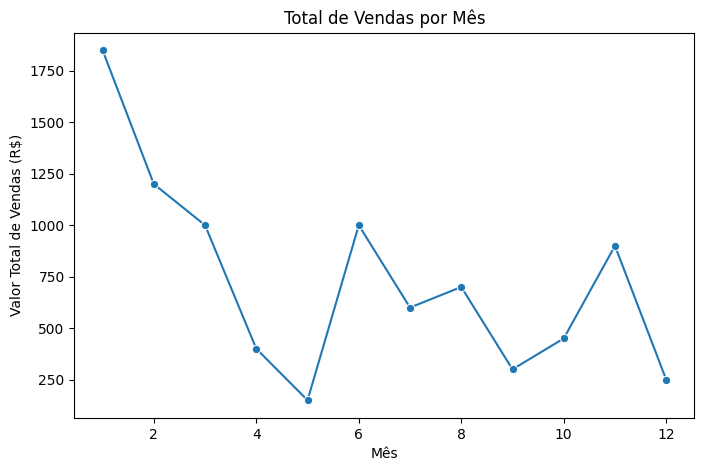

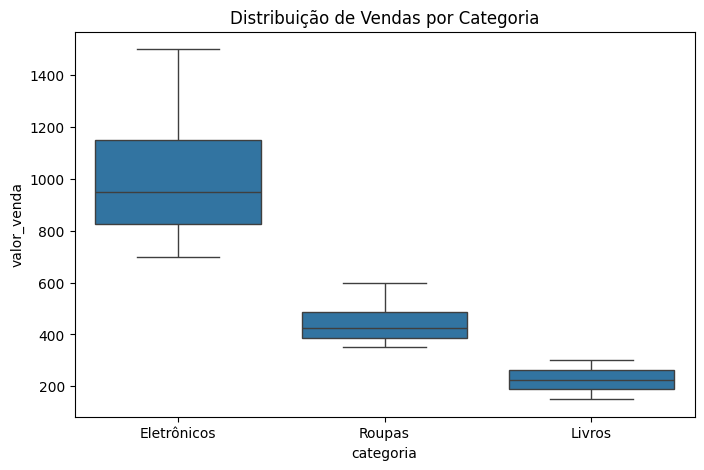


=== Conclusões e Insights ===
- A categoria com maior faturamento foi: Eletrônicos
- O mês com maior volume de vendas foi: 1
- O produto mais valioso vendido foi: Produto A
- Sugestão: investir mais em campanhas para a categoria de maior faturamento e reforçar promoções nos meses de menor desempenho.


In [1]:
import sqlite3
# Passo 1.1: Conectar ao banco de dados (ou criar, se não existir)
conexao = sqlite3.connect('dados_vendas.db')
# Passo 1.2: Criar um cursor
cursor = conexao.cursor()
# Passo 1.3: Criar uma tabela (se não existir)
cursor.execute('''
CREATE TABLE IF NOT EXISTS vendas1 (
id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
data_venda DATE,
produto TEXT,
categoria TEXT,
valor_venda REAL
)
''')
# Passo 1.4: Inserir alguns dados
cursor.execute('''
INSERT INTO vendas1 (data_venda, produto, categoria, valor_venda) VALUES
('2023-01-01', 'Produto A', 'Eletrônicos', 1500.00),
('2023-01-05', 'Produto B', 'Roupas', 350.00),
('2023-02-10', 'Produto C', 'Eletrônicos', 1200.00),
('2023-03-15', 'Produto D', 'Livros', 200.00),
('2023-03-20', 'Produto E', 'Eletrônicos', 800.00),
('2023-04-02', 'Produto F', 'Roupas', 400.00),
('2023-05-05', 'Produto G', 'Livros', 150.00),
('2023-06-10', 'Produto H', 'Eletrônicos', 1000.00),
('2023-07-20', 'Produto I', 'Roupas', 600.00),
('2023-08-25', 'Produto J', 'Eletrônicos', 700.00),
('2023-09-30', 'Produto K', 'Livros', 300.00),
('2023-10-05', 'Produto L', 'Roupas', 450.00),
('2023-11-15', 'Produto M', 'Eletrônicos', 900.00),
('2023-12-20', 'Produto N', 'Livros', 250.00);
''')
# Passo 1.5: Confirmar as mudanças
conexao.commit()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_vendas = pd.read_sql_query('SELECT * FROM vendas1', conexao)
print("Pré-visualização dos dados:")
print(df_vendas.head())

# Informações básicas
print("\nInformações do DataFrame:")
print(df_vendas.info())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df_vendas.describe())

# Converter coluna data_venda para datetime
df_vendas['data_venda'] = pd.to_datetime(df_vendas['data_venda'])
df_vendas['mes'] = df_vendas['data_venda'].dt.month

# ------------------------------------------------
# Passo 3: Análise dos dados
# ------------------------------------------------

# Total de vendas por categoria
vendas_por_categoria = df_vendas.groupby("categoria")["valor_venda"].sum()
print("\nTotal de vendas por categoria:")
print(vendas_por_categoria)

# Total de vendas por mês
vendas_por_mes = df_vendas.groupby("mes")["valor_venda"].sum()
print("\nTotal de vendas por mês:")
print(vendas_por_mes)

# Produto com maior valor de venda
produto_top = df_vendas.loc[df_vendas["valor_venda"].idxmax()]
print("\nProduto de maior venda:")
print(produto_top)

# ------------------------------------------------
# Passo 4: Visualizações
# ------------------------------------------------

plt.figure(figsize=(8,5))
sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values)
plt.title("Total de Vendas por Categoria")
plt.ylabel("Valor Total de Vendas (R$)")
plt.xlabel("Categoria")
plt.show()

plt.figure(figsize=(8,5))
sns.lineplot(x=vendas_por_mes.index, y=vendas_por_mes.values, marker="o")
plt.title("Total de Vendas por Mês")
plt.ylabel("Valor Total de Vendas (R$)")
plt.xlabel("Mês")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="categoria", y="valor_venda", data=df_vendas)
plt.title("Distribuição de Vendas por Categoria")
plt.show()

# ------------------------------------------------
# Passo 5: Conclusões e insights
# ------------------------------------------------
print("\n=== Conclusões e Insights ===")
print("- A categoria com maior faturamento foi:", vendas_por_categoria.idxmax())
print("- O mês com maior volume de vendas foi:", vendas_por_mes.idxmax())
print("- O produto mais valioso vendido foi:", produto_top['produto'])
print("- Sugestão: investir mais em campanhas para a categoria de maior faturamento e reforçar promoções nos meses de menor desempenho.")
# Passo 1.6: Fechar a conexão
conexao.close()


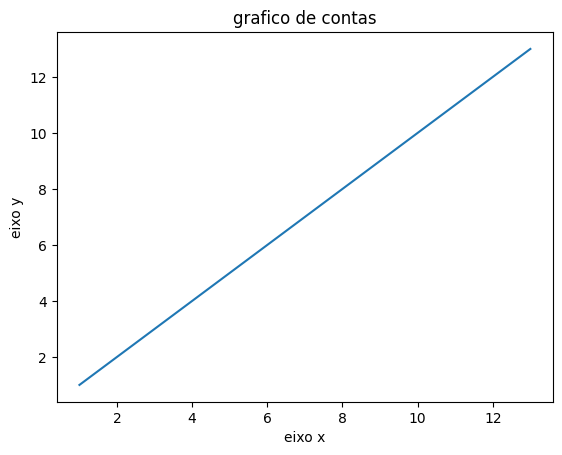

In [2]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5,6,7,8,9,10,11,12,13]
y = [1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.plot(x,y)
plt.xlabel('eixo x')
plt.ylabel('eixo y')
plt.title('grafico de contas')
plt.show()



In [3]:
print("bem vindo a classificação de filmes")
print('nos avalie para melhorar nosso serviço')
print('lembrando que 0 é RECUSAR a avaliação!!')
avaliacao = int(input('digte sua avaliação de 1 à 10: '))
if avaliacao <= 3:
  print('obrigado pela sua opnião, prometemos que iremos melhorar.')
if avaliacao >=4:
  print('foi muito bom ter você conosco, te esperamos até uma proxima vez')
elif avaliacao == 0:
  print('voce optou por não nòs avaliar, obrigado pela preferencia!')


bem vindo a classificação de filmes
nos avalie para melhorar nosso serviço
lembrando que 0 é RECUSAR a avaliação!!


KeyboardInterrupt: Interrupted by user

# Aula 2





In [4]:

nome = input("digite seu nome  ")
print('ola,'+nome)
print('seja bem vindo')
nota = int(input('digite sua nota: '))
if nota < 5:
  print('voce nao passou, estude mais')
elif nota >=5 and nota <7:
    print('voce passou')
else:
  print('voce é foda, passou acima da media')

KeyboardInterrupt: Interrupted by user

In [15]:
html_code="""
<html>
<head>
 <title> Meu primeiro site html.com</title>
</head>
<body>
 <h1> Olá, usuario!</h1>
 <p> o prefessor não sabe ensinar muito bem, então estou fazendo devagar </p>
 </body>
 </html>

 """
from IPython.core.display import HTML
HTML(html_code)
